Libraries required to run the code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

Read data from CSV

In [2]:
df = pd.read_csv("data_week3.csv", names=["x1", "x2", "y"], header=None, comment='#')
display(df.head())
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
x = np.column_stack((x1, x2))
y = df.iloc[:,2]

,x1,x2,y
0,-0.45,-0.72,-1.025864
1,0.11,0.21,0.056347
2,-0.89,-0.68,-1.889089
3,0.84,-0.12,-1.427458
4,-0.42,-0.37,-0.187069


3-D Scatter plot of the loaded data showing x1 on x-axis, x2 on y-axis and y on z-axis

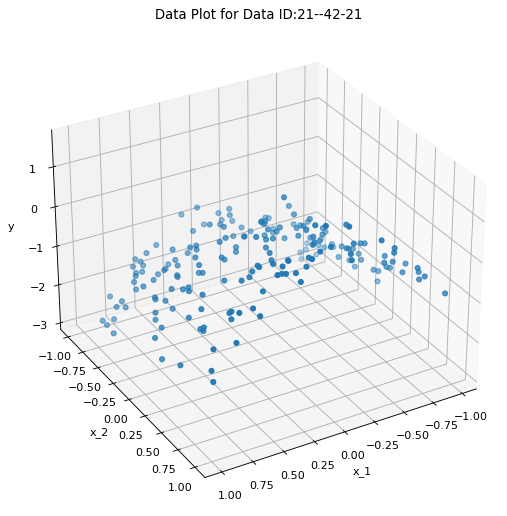

In [3]:
figure = plot.figure(figsize=(8, 8), dpi = 80)
plot_final = figure.add_subplot(111, projection = '3d')
plot_final.scatter(x1, x2, y)
plot_final.set_xlabel("x_1")
plot_final.set_ylabel("x_2")
plot_final.set_zlabel("y")
plot_final.set_title('Data Plot for Data ID:21--42-21')
plot_final.view_init(azim = 60)

Adding polynomial feature of upto Degree 5 to train data

In [4]:
poly_features_function = PolynomialFeatures(5)
x_poly_features  = poly_features_function.fit_transform(x)

## 5-fold Cross validation for Lasso Regression for selecting penalty parameter

In [5]:

def calculate_mse_stddev_penalty_lasso(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        lasso_model = Lasso(alpha = 1 / (2 * penalty))
        mean_sqaure_error_fold = []
        for train_data_index, test_data_index in k_fold_split_function.split(x_poly_features):
            lasso_model.fit(x_poly_features[train_data_index], y[train_data_index])
            predictions = lasso_model.predict(x_poly_features[test_data_index])
            mean_sqaure_error_fold.append(mean_squared_error(y[test_data_index], predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty
    

Testing 5-Fold Cross Validation with different values of penalty paramters C to find best C value for our model

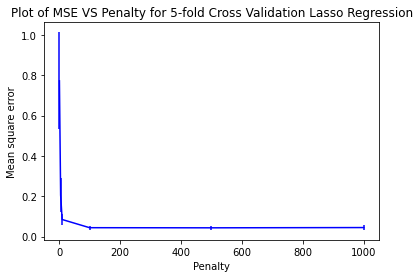

In [6]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plot.show()

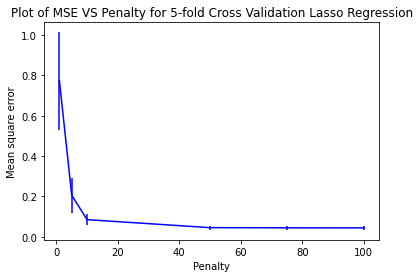

In [7]:
penalty_parameters = [1, 5, 10, 50, 75, 100]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plot.show()

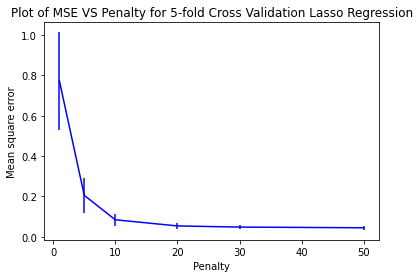

In [8]:
penalty_parameters = [1, 5, 10, 20, 30, 50]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plot.show()

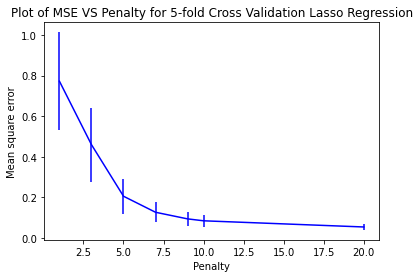

In [9]:
penalty_parameters = [1, 3, 5, 7, 9, 10, 20]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plot.show()

## 5-fold Cross validation for Ridge Regression for selecting penalty parameter

In [10]:

def calculate_mse_stddev_penalty_Ridge(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        ridge_model = Ridge(alpha = 1 / (2 * penalty))
        mean_sqaure_error_fold = []
        for train_data_index, test_data_index in k_fold_split_function.split(x_poly_features):
            ridge_model.fit(x_poly_features[train_data_index], y[train_data_index])
            predictions = ridge_model.predict(x_poly_features[test_data_index])
            mean_sqaure_error_fold.append(mean_squared_error(y[test_data_index], predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty
    

Testing 5-Fold Cross Validation with different values of penalty paramters C to find best C value for our model

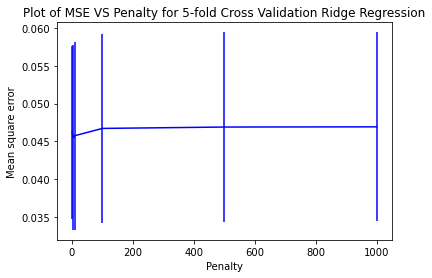

In [11]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_Ridge(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Ridge Regression')
plot.show()

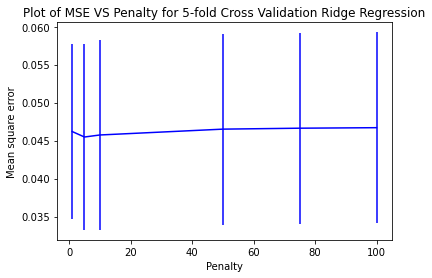

In [12]:
penalty_parameters = [1, 5, 10, 50, 75, 100]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_Ridge(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Ridge Regression')
plot.show()

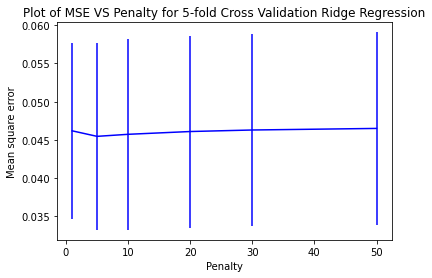

In [13]:
penalty_parameters = [1, 5, 10, 20, 30, 50]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_Ridge(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Ridge Regression')
plot.show()

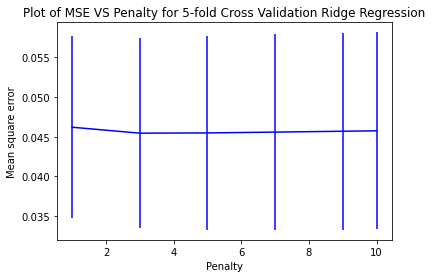

In [14]:
penalty_parameters = [1, 3, 5, 7, 9, 10]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_Ridge(penalty_parameters)

plot.figure()
plot.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plot.xlabel('Penalty')
plot.ylabel('Mean square error')
plot.title('Plot of MSE VS Penalty for 5-fold Cross Validation Ridge Regression')
plot.show()